In [0]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
batch_size = 15
learning_rate = 0.0002
num_epoch = 5

In [4]:
mnist_train = dset.MNIST('./',train=True,transform=transforms.ToTensor(),target_transform=None,download=True)
mnist_test = dset.MNIST('./',train=False,transform=transforms.ToTensor(),target_transform=None,download=True)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!



In [0]:
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size,shuffle=False)

In [0]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder,self).__init__()
        self.encoder = nn.Linear(28*28,20)
        self.decoder = nn.Linear(20,28*28)
    
    def forward(self,x):
        x = x.view(batch_size,-1)
        encoded = self.encoder(x)
        out = self.decoder(encoded).view(batch_size,1,28,28)
        return out
    
model = AutoEncoder().cuda()

In [0]:
loss_func = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

In [12]:
loss_arr = []

for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        x = image.cuda()
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output, x)
        loss.backward()
        optimizer.step()

        if j%1000 == 0:
            print(loss)
            loss_arr.append(loss.item())

tensor(0.1434, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0571, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0401, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0363, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0381, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0331, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0336, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0268, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0267, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0246, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0265, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0248, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0252, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0255, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0251, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0261, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0276, device='cuda:0', grad_fn=<MseLossBackward

torch.Size([15, 1, 28, 28])

torch.Size([15, 28, 28])


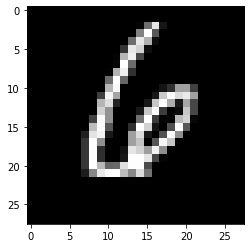

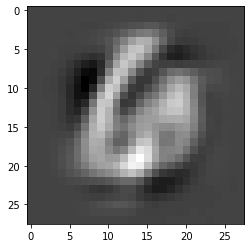

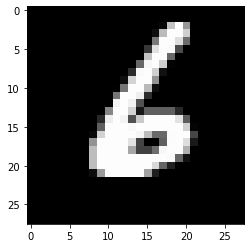

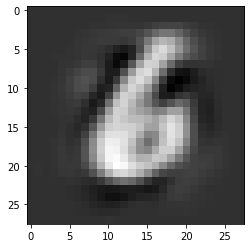

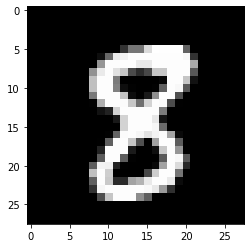

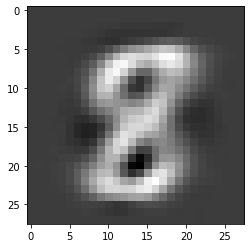

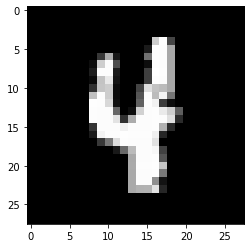

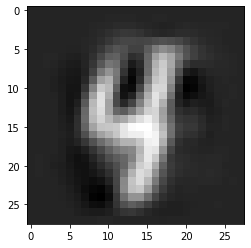

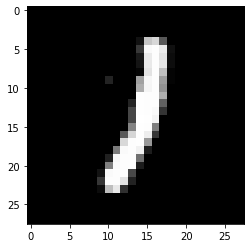

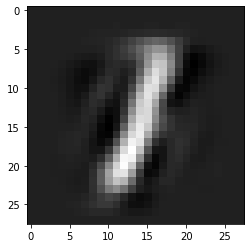

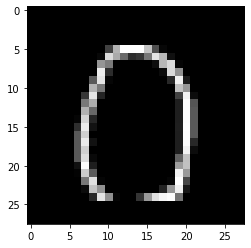

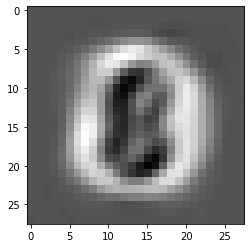

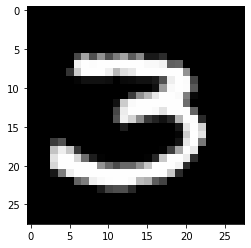

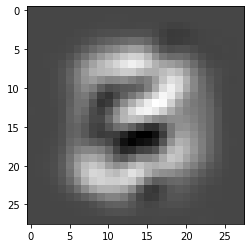

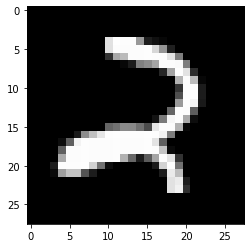

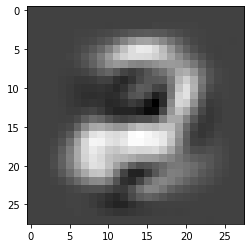

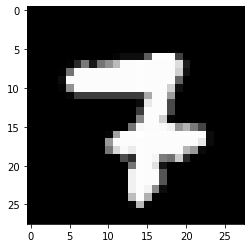

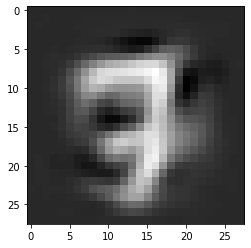

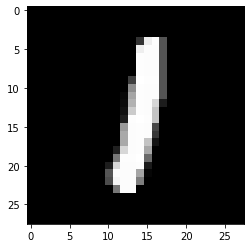

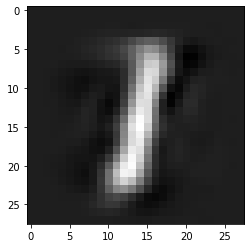

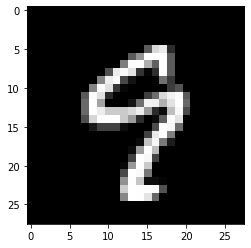

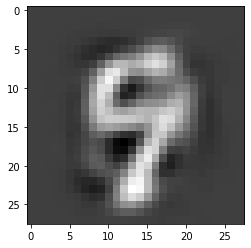

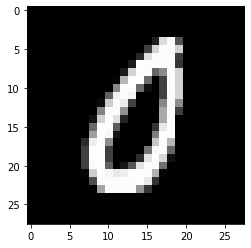

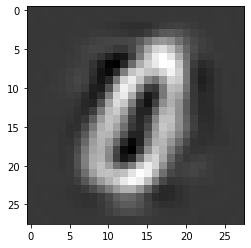

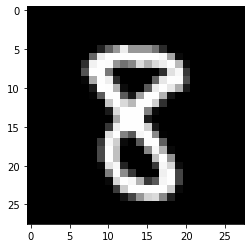

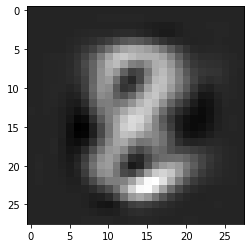

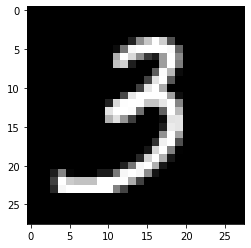

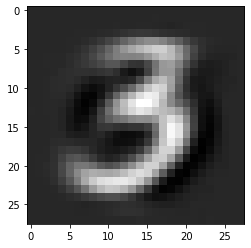

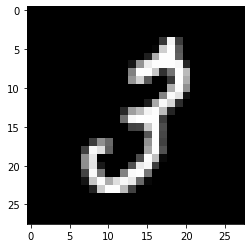

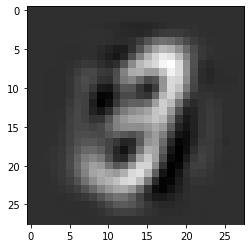

In [22]:
out_img = torch.squeeze(output.cpu().detach())
print(out_img.size())

for i in range(out_img.size()[0]):
    plt.imshow(torch.squeeze(image[i]).numpy(),cmap='gray')
    plt.show()
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()